# Wave Project

## By: Alexis Morse


<img src="out.gif" width="450" height="250">

### Abstract:

The wave equation defines a sets of 20 points, $x$ & $y$, both ranging from a scale of -1 to 1. We solve for $U_{tt}$ which is the function of time with respect 

to $ U_{xx} + U_{yy}$. The initial value equation for every $x$ and $y$ value is as follows 

$$ e^ {-\frac{1}{2}(x*x + y*y) / (0.1 ^2)} $$

Using the *Taylor Expansion* to approximate we can set up the grid of values which forms the wave, as seen in the image above. The points $x_i$ and $y_i$ are each 

possible position on the $x$ and $y$ axis from a range of -1 to 1. This grid is 3 dimensions so we are calculating the points using the Taylor expansion to find the 

values of Z, also known as $U_{tt}$. 

The change in points are defined by Cartesian coordinates, an additive equation that represents the distance from perpendicular lines that interset at the origin point. In the initialization section, you subtract the change in time multiplied by 

------------------------------------------------------

# Results

First we have a serial test of the wave project without the use of parallel programming techniques. I ran a time test 20 

times then averages the times it took to run the program. The program for averaging is as shown below

The average run time of the serial program is 0.01975754


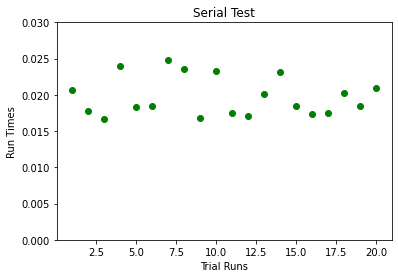

In [1]:
import matplotlib.pyplot as plt
import numpy as np

times = [0.0207202, 0.0178376, 0.0166965, 0.0240438,  0.018265,\
         0.0184283, 0.0247975, 0.0235521, 0.0168302, 0.0232333, \
         0.017483, 0.0170326, 0.020098, 0.0231881, 0.0184656, 0.017382, \
         0.0174514,  0.0202253, 0.0184537, 0.0209666]

trials = np.arange(1,21)

plt.scatter(trials, times, c = "green")
plt.title("Serial Test")
plt.xlabel("Trial Runs")
plt.ylabel("Run Times")
plt.ylim(0, 0.030)
time_mean = np.mean(times)
print("The average run time of the serial program is {}".format(time_mean))

### Open MP

#### First Method: #pragma openmp parallel for collapse( ) on nested for loops

There are two for loops within the code, one is a single nested for loop and i used the following code to improve the code 

`#pragma omp parallel for collapse(2) private(it, j)`

On the second for loop, there were 6 for loops nested within the initial for loop. Therefore, I had to use the following command, similar to the one above but changing values to account for the size of the for loop.

`#pragma omp parallel for collapse(7) private(it, j, i)`

The average run time of the OpenMP Collapse program method is 0.019105854999999998


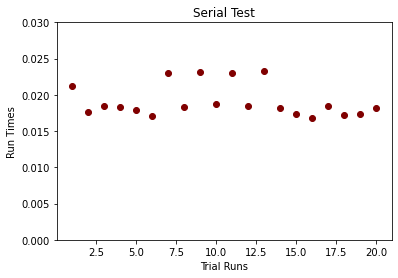

In [2]:
times = [0.021243,  0.0176018, 0.0184186, 0.018308, 0.0178828, 0.0170756,\
         0.0230785, 0.0183478, 0.0231974, 0.0186802, 0.0229645, 0.0184417,\
         0.0233235,  0.0182232, 0.0173285, 0.0168193, 0.0184054, 0.0171735,\
         0.0174065, 0.0181973]

trials = np.arange(1,21)

plt.scatter(trials, times, c = "maroon")
plt.title("Serial Test")
plt.xlabel("Trial Runs")
plt.ylabel("Run Times")
plt.ylim(0, 0.030)
time_mean = np.mean(times)
print("The average run time of the OpenMP Collapse program method is {}".format(time_mean))

#### Second Method: #pragma openmp parallel for schedule(static) on nested for loops

There are two for loops within the code, one is a single nested for loop and i used the following code to improve the code 

`#pragma omp for schedule(static, 3)`

For this instance I also used the code above on the bigger loop. This allows for less calls to the runtime library and hopefully will show an improvement in run time. By splitting up the assigning of variables into different threads, the calculations can occur in a worksharing loop environment

The average run time of the OpenMP Collapse program method is 0.018057520000000004


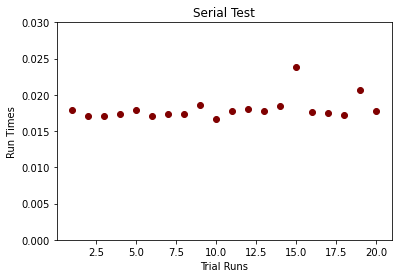

In [3]:
times = [0.0178683,  0.0170896, 0.0170896, 0.0174092, 0.0178828, 0.0170756,\
         0.017307, 0.017371, 0.0185422, 0.0166396, 0.017745, 0.0180805,\
         0.0178145,  0.0184864, 0.0238791, 0.0175909, 0.0175583, 0.0171643,\
         0.0207312, 0.0178253]

trials = np.arange(1,21)

plt.scatter(trials, times, c = "maroon")
plt.title("Serial Test")
plt.xlabel("Trial Runs")
plt.ylabel("Run Times")
plt.ylim(0, 0.030)
time_mean = np.mean(times)
print("The average run time of the OpenMP Collapse program method is {}".format(time_mean))

#### Third Method: #pragma openmp parallel for reduction on variables within nested for loops

There are two for loops within the code, one is a single nested for loop and i used the following code to improve the code 

`#pragma omp parallel for reduction(- : um)`

On the second for loop, there were 6 for loops nested within the initial for loop. Therefore, I had to use the following command, similar to the one above but changing values based on what the wave equation is calculating, as well as the operation type (+, *, -, .

` #pragma omp parallel for reduction(* : t) reduction(* : Lap) reduction(+ : up)`

The average run time of the OpenMP reduction program method is 0.02023751


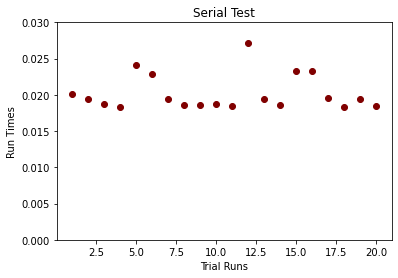

In [4]:
times = [0.0200906,  0.0194019, 0.018679, 0.018308, 0.0240659, 0.022893,\
         0.0194378, 0.0186605, 0.018628, 0.0186802, 0.0185021, 0.0271282,\
         0.0194205,   0.0185674, 0.0232926, 0.0232383, 0.0195182, 0.0183108,\
         0.0194116, 0.0185156]

trials = np.arange(1,21)

plt.scatter(trials, times, c = "maroon")
plt.title("Serial Test")
plt.xlabel("Trial Runs")
plt.ylabel("Run Times")
plt.ylim(0, 0.030)
time_mean = np.mean(times)
print("The average run time of the OpenMP reduction program method is {}".format(time_mean))

### MPI